In [126]:
import json
import networkx as nx
import pycountry
import matplotlib.pyplot as plt
from collections import Counter
from mpl_toolkits.basemap import Basemap

In [215]:
def normalize_country(country):
    if country is None:
        return None

    if len(country) == 2:
        new_country = pycountry.countries.get(alpha_2 = country)

        return new_country.alpha_3

    if len(country) == 3:
        new_country = pycountry.countries.get(alpha_3 = country)

        return new_country.alpha_3

    raise Exception("Hmm")

def get_graph(graph_json_path, only_direct=False):
    graph_json = json.load(open(graph_json_path))
    G = nx.DiGraph()

    edges_to_add = []
    for from_node, neighbours in graph_json["adjacency"].items():
        for to_node, data in neighbours.items():
            if only_direct and not data.get("direct", False):
                continue
            edges_to_add.append((from_node, to_node, { "weight": data.get("duration"), "direct": data.get("direct") }))

    nodes_to_add = []
    for node_id, node_data in graph_json["nodes"].items():
        node_attrs = {
            "name": node_data["name"],
            "position": node_data.get("position"),
            "country": normalize_country(node_data.get("country"))
        }
        nodes_to_add.append((node_id, node_attrs))

    G.add_nodes_from(nodes_to_add)
    G.add_edges_from(edges_to_add)

    return G

def filter_country(G, country):
    G_copy = G.copy()
    nodes_to_remove = []

    for node in G.nodes:
        if G.nodes[node]["country"] != country:
            nodes_to_remove.append(node)

    G_copy.remove_nodes_from(nodes_to_remove)

    return G_copy

In [216]:
G = get_graph("/path/to/graph.json", only_direct=False)

In [217]:
print(f"Edges count: {len(G.edges)}")
print(f"Nodes count: {len(G.nodes)}")

Edges count: 1022078
Nodes count: 35771


In [218]:
Counter([G.nodes[node]["country"] for node in G.nodes])

Counter({'DEU': 7665,
         'NLD': 412,
         'CHE': 2150,
         'FIN': 203,
         'RUS': 10,
         'ESP': 1032,
         'BLR': 3,
         'UKR': 64,
         'MDA': 2,
         'LTU': 2,
         'LVA': 3,
         'POL': 2624,
         None: 34,
         'BGR': 667,
         'SRB': 192,
         'ROU': 1331,
         'CZE': 2411,
         'HUN': 1173,
         'SVK': 716,
         'IRL': 1,
         'MNE': 48,
         'MKD': 17,
         'GBR': 2616,
         'PRT': 424,
         'BIH': 13,
         'HRV': 481,
         'GRC': 44,
         'SWE': 528,
         'NOR': 336,
         'TUR': 3,
         'SVN': 258,
         'AUT': 1340,
         'FRA': 5408,
         'LUX': 71,
         'LIE': 4,
         'ITA': 2447,
         'DNK': 468,
         'MCO': 2,
         'AND': 1,
         'BEL': 567})

In [219]:
G_cze = filter_country(G, "CZE")

In [221]:
len(G_cze.edges)

63661

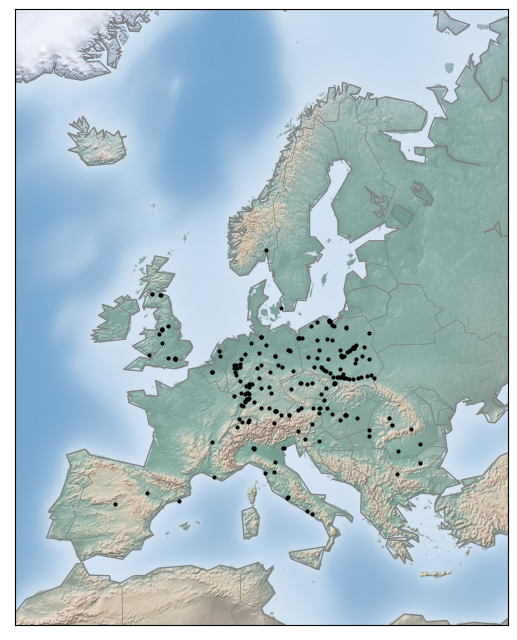

In [214]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='c',
            lat_0=55, lon_0=10,
            width=4E6, height=5E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

#cze_nodes = list([(node, G.nodes[node]) for node in G.nodes if G.nodes[node]["country"] == "CZE"])
#to_plot_nodes = list([(node, data) for node, data in cze_nodes if G.degree(node) > 250])
to_plot_nodes = list([(n, G.nodes[n]) for n in G.nodes() if G.degree(n) > 350])

for node, data in to_plot_nodes:
    x, y = m(data["position"]["long"], data["position"]["lat"])
    plt.plot(x, y, 'ok', markersize=2)

# Map (long, lat) to (x, y) for plotting
# x, y = m(-122.3, 47.6)
#plt.plot(x, y, 'ok', markersize=5)
#plt.text(x, y, ' Seattle', fontsize=12);

In [ ]:
centrality = nx.betweenness_centrality(G)

In [ ]:
sorted_centrality = sorted([(value, key) for key, value in centrality.items()], reverse=True)

In [225]:
centrality_cze = nx.betweenness_centrality(G_cze)

In [228]:
sorted_centrality_cze = sorted([(value, key) for key, value in centrality_cze.items()], reverse=True)

In [232]:
list([(centrality, node, G_cze.nodes[node]) for centrality, node in sorted_centrality_cze[:30]])

[(0.30635217906646406,
  '5400014',
  {'name': 'Praha hl.n.',
   'position': {'lat': 50.083058, 'long': 14.436038},
   'country': 'CZE'}),
 (0.11006843274626892,
  '5400022',
  {'name': 'Kolin(CZ)',
   'position': {'lat': 50.025437, 'long': 15.214279},
   'country': 'CZE'}),
 (0.09623768992225959,
  '5400001',
  {'name': 'Brno hl.n.',
   'position': {'lat': 49.190537, 'long': 16.612776},
   'country': 'CZE'}),
 (0.08561206302245068,
  '5400012',
  {'name': 'Plzen hl.n.',
   'position': {'lat': 49.743167, 'long': 13.388246},
   'country': 'CZE'}),
 (0.07496110216053907,
  '5400161',
  {'name': 'Pardubice hl.n.',
   'position': {'lat': 50.031739, 'long': 15.756212},
   'country': 'CZE'}),
 (0.06160507205111193,
  '5400010',
  {'name': 'Olomouc hl.n.',
   'position': {'lat': 49.593128, 'long': 17.277932},
   'country': 'CZE'}),
 (0.040663722526162106,
  '5400198',
  {'name': 'Liberec',
   'position': {'lat': 50.761429, 'long': 15.045947},
   'country': 'CZE'}),
 (0.03887279393116729,
  '5

In [246]:
h, a = nx.hits(G)
h_cze, a_cze = nx.hits(G_cze)

/Users/vhotmar/Projects/school/mff/NAIL116/project/venv/lib/python3.11/site-packages/networkx/algorithms/link_analysis/hits_alg.py:78: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, nodelist=list(G), dtype=float)


In [247]:
sorted_h = sorted([(value, key) for key, value in h.items()], reverse=True)
sorted_a = sorted([(value, key) for key, value in a.items()], reverse=True)
sorted_h_cze = sorted([(value, key) for key, value in h_cze.items()], reverse=True)
sorted_a_cze = sorted([(value, key) for key, value in a_cze.items()], reverse=True)

In [253]:
list([(hub, node, G.nodes[node]) for hub, node in sorted_h[:100]])

[(0.00519750204304752,
  '5100234',
  {'name': 'Przemysl Glowny',
   'position': {'lat': 49.783664, 'long': 22.776364},
   'country': 'POL'}),
 (0.005024901156312842,
  '5100066',
  {'name': 'Warszawa Wschodnia',
   'position': {'lat': 52.251544, 'long': 21.052332},
   'country': 'POL'}),
 (0.004926035753534526,
  '5100057',
  {'name': 'Szczecin Glowny',
   'position': {'lat': 53.418784, 'long': 14.550318},
   'country': 'POL'}),
 (0.004856788857903631,
  '5101932',
  {'name': 'Lancut',
   'position': {'lat': 50.081431, 'long': 22.22751},
   'country': 'POL'}),
 (0.004823715817271304,
  '5100028',
  {'name': 'Krakow Glowny',
   'position': {'lat': 50.067192, 'long': 19.947423},
   'country': 'POL'}),
 (0.004819756400199202,
  '8103000',
  {'name': 'Wien Hbf',
   'position': {'lat': 48.184923, 'long': 16.375865},
   'country': 'AUT'}),
 (0.004793972524080653,
  '5100229',
  {'name': 'Rzeszow Gl.',
   'position': {'lat': 50.04311, 'long': 22.006798},
   'country': 'POL'}),
 (0.0047727978

In [252]:
list([(authority, node, G.nodes[node]) for authority, node in sorted_a[:100]])

[(0.00511048380152394,
  '5100234',
  {'name': 'Przemysl Glowny',
   'position': {'lat': 49.783664, 'long': 22.776364},
   'country': 'POL'}),
 (0.005052238784487746,
  '5100057',
  {'name': 'Szczecin Glowny',
   'position': {'lat': 53.418784, 'long': 14.550318},
   'country': 'POL'}),
 (0.004923231174829275,
  '8103000',
  {'name': 'Wien Hbf',
   'position': {'lat': 48.184923, 'long': 16.375865},
   'country': 'AUT'}),
 (0.00486329138114845,
  '5100028',
  {'name': 'Krakow Glowny',
   'position': {'lat': 50.067192, 'long': 19.947423},
   'country': 'POL'}),
 (0.004810746959167133,
  '5101932',
  {'name': 'Lancut',
   'position': {'lat': 50.081431, 'long': 22.22751},
   'country': 'POL'}),
 (0.004808082080213159,
  '5100010',
  {'name': 'Gdynia Glowna',
   'position': {'lat': 54.520844, 'long': 18.529555},
   'country': 'POL'}),
 (0.0047793008025055475,
  '5100229',
  {'name': 'Rzeszow Gl.',
   'position': {'lat': 50.04311, 'long': 22.006798},
   'country': 'POL'}),
 (0.004746758993328

In [240]:
G_cze.nodes["5400022"]

{'name': 'Kolin(CZ)',
 'position': {'lat': 50.025437, 'long': 15.214279},
 'country': 'CZE'}

In [242]:
pagerank = nx.pagerank(G)
pagerank_cze = nx.pagerank(G_cze)

In [243]:
sorted_pagerank = sorted([(value, key) for key, value in pagerank.items()], reverse=True)
sorted_pagerank_cze = sorted([(value, key) for key, value in pagerank_cze.items()], reverse=True)

In [254]:
list([(pagerank, node, G.nodes[node]) for pagerank, node in sorted_pagerank[:100]])

[(0.0009341723867670893,
  '5400014',
  {'name': 'Praha hl.n.',
   'position': {'lat': 50.083058, 'long': 14.436038},
   'country': 'CZE'}),
 (0.0008312417053167574,
  '8103000',
  {'name': 'Wien Hbf',
   'position': {'lat': 48.184923, 'long': 16.375865},
   'country': 'AUT'}),
 (0.0007900604653932634,
  '8000105',
  {'name': 'Frankfurt(Main)Hbf',
   'position': {'lat': 50.106817, 'long': 8.663003},
   'country': 'DEU'}),
 (0.0006943598804205022,
  '8002549',
  {'name': 'Hamburg Hbf',
   'position': {'lat': 53.553533, 'long': 10.00636},
   'country': 'DEU'}),
 (0.0006888633355273649,
  '8000261',
  {'name': 'München Hbf',
   'position': {'lat': 48.140364, 'long': 11.558744},
   'country': 'DEU'}),
 (0.0006630860714959541,
  '8100514',
  {'name': 'Wien Meidling',
   'position': {'lat': 48.174451, 'long': 16.333085},
   'country': 'AUT'}),
 (0.0006448172664167645,
  '8503000',
  {'name': 'Zürich HB',
   'position': {'lat': 47.378177, 'long': 8.540211},
   'country': 'CHE'}),
 (0.00060118

In [255]:
closeness_centrality_cze = nx.closeness_centrality(G_cze)

In [257]:
sorted_closeness_centrality_cze = sorted([(value, key) for key, value in closeness_centrality_cze.items()], reverse=True)

In [259]:
list([(cc, node, G_cze.nodes[node]) for cc, node in sorted_closeness_centrality_cze[:100]])

[(0.5094081442143205,
  '5400014',
  {'name': 'Praha hl.n.',
   'position': {'lat': 50.083058, 'long': 14.436038},
   'country': 'CZE'}),
 (0.44104395710634087,
  '5400022',
  {'name': 'Kolin(CZ)',
   'position': {'lat': 50.025437, 'long': 15.214279},
   'country': 'CZE'}),
 (0.4402234102093988,
  '5400130',
  {'name': 'Praha-Liben',
   'position': {'lat': 50.100686, 'long': 14.502297},
   'country': 'CZE'}),
 (0.431394864152328,
  '5400001',
  {'name': 'Brno hl.n.',
   'position': {'lat': 49.190537, 'long': 16.612776},
   'country': 'CZE'}),
 (0.4287372404195541,
  '5400161',
  {'name': 'Pardubice hl.n.',
   'position': {'lat': 50.031739, 'long': 15.756212},
   'country': 'CZE'}),
 (0.4187224968811748,
  '5400012',
  {'name': 'Plzen hl.n.',
   'position': {'lat': 49.743167, 'long': 13.388246},
   'country': 'CZE'}),
 (0.4172457820270708,
  '5400010',
  {'name': 'Olomouc hl.n.',
   'position': {'lat': 49.593128, 'long': 17.277932},
   'country': 'CZE'}),
 (0.40888212024805926,
  '54002